In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=18)
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', markersize=10)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
def normalize(X):
    X = X.astype('float32')
    X /= 255
    return X

def one_hot_encode(y):
    return to_categorical(y)

In [26]:
X_train = normalize(X_train)
X_test = normalize(X_test)

In [27]:
y_train, y_test = one_hot_encode(y_train), one_hot_encode(y_test)

In [28]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [29]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [30]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(4, 4), activation='relu'))
model.add(MaxPooling2D())
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        32832     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               991360    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [31]:
model.fit(X_train, y_train, epochs=10, batch_size=128, verbose=1)

Epoch 1/10


2023-09-27 16:18:08.077536: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 11s 22ms/step - loss: 0.1471 - accuracy: 0.9549
Epoch 2/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0502 - accuracy: 0.9853
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0481 - accuracy: 0.9867
Epoch 4/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0585 - accuracy: 0.9867
Epoch 5/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1177 - accuracy: 0.9843
Epoch 6/10
469/469 [==============================] - 10s 22ms/step - loss: 0.4294 - accuracy: 0.9801
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 1.4529 - accuracy: 0.9797
Epoch 8/10
469/469 [==============================] - 10s 21ms/step - loss: 4.6650 - accuracy: 0.9784
Epoch 9/10
469/469 [==============================] - 10s 21ms/step - loss: 10.0793 - accuracy: 0.9792
Epoch 10/10
469/469 [==============================] - 10s 21ms/step - loss: 18.3094 - accur

In [32]:
model.evaluate(X_test, y_test)

 12/313 [>.............................] - ETA: 3s - loss: 28.9981 - accuracy: 0.9714

2023-09-27 16:19:49.270318: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 30.2831 - accuracy: 0.9772


[30.283105850219727, 0.9771999716758728]

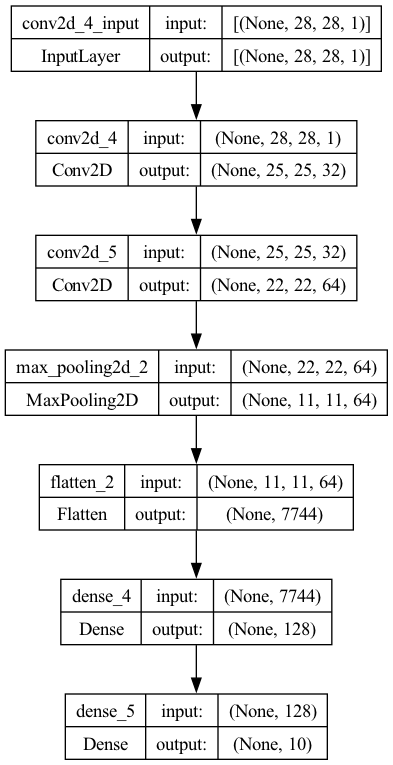

In [33]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

2023-09-27 16:19:52.831677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 12ms/step


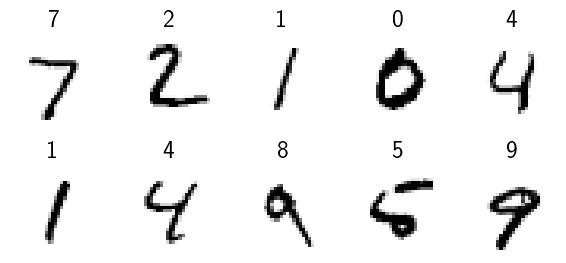

In [34]:
fig, axes = plt.subplots(2, 5, figsize=(6, 3))
axes = axes.flatten()
for img, ax in zip(X_test[:10], axes):
    ax.imshow(img.reshape(28, 28), cmap='Greys')
    pred = np.argmax(model.predict(img.reshape(-1, 28, 28, 1)))
    ax.set_title(pred)
    ax.axis('off')
plt.tight_layout()
plt.show()